
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> **What I'm going to do**: in this project, I'll be analyzing the  DataSet that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
In particular, I'm interested in multi findings like if the movies with the high budget have a high vote_average? and dose the highest vote make a lot of revenue? which one of the title movies has the highest vote ?

In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
# Data Wrangling

> **What I'm doing**: In the next cell, I'm going to load the data, and check a few lines and which kind of cleaning I need to perform and to figure out the structure and understand. Therefore, I will use the method *info()* to see the datatype and if it's needed to be fixed.

### load the dataset

In [207]:
dfCredit = pd.read_csv('tmdb_5000_credits.csv')

### over view on the datatype

In [208]:
dfCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


### over view on the dataset structure

In [209]:

dfCredit.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


### how many rows and colmuns in the dataset?

In [210]:

dfCredit.shape

(4803, 4)

### load the dataset

In [211]:

dfMovie = pd.read_csv('tmdb_5000_movies.csv')

### over view on the datatype

In [212]:
dfMovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### how many rows and colmuns in the dataset?

In [213]:
dfMovie.shape

(4803, 20)

### over view on the dataset structure

In [214]:

dfMovie.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### over view in the static summary

In [215]:
dfMovie.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Histogram for the whole DataFrame

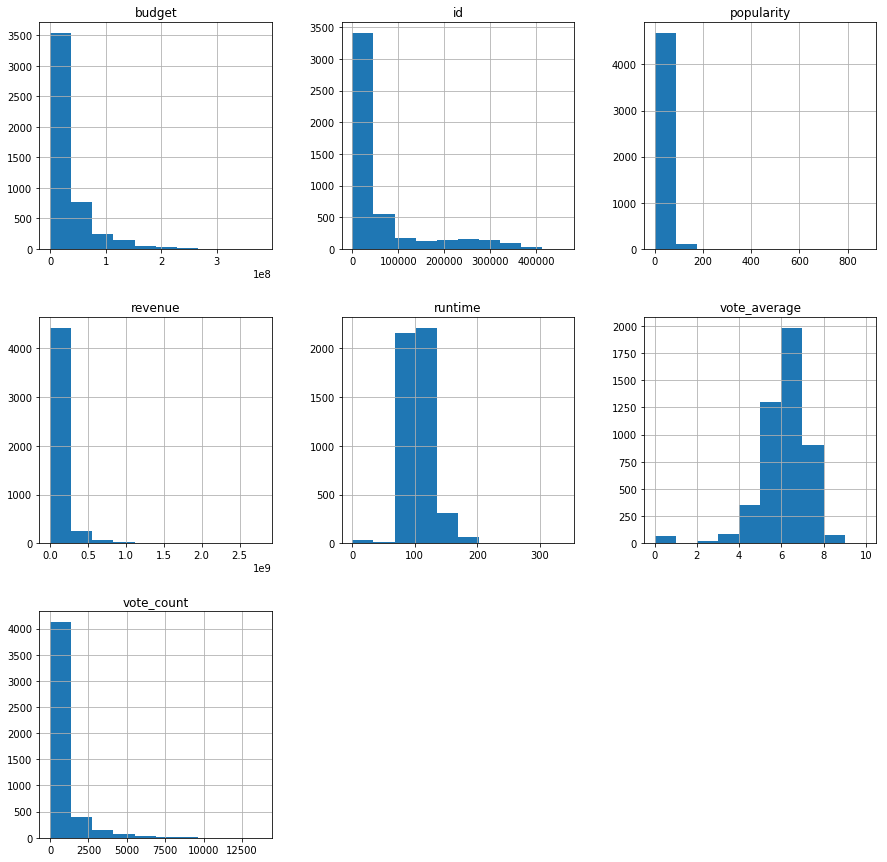

In [216]:
dfMovie.hist(figsize=[15,15]);

#### The budget is skewed to the right wich mean it's agree with the summart statstic that I found 
#### The vote_average is skewed to the lift in the majority of them between 6,7


### scatter matrix for the whole DataFrame

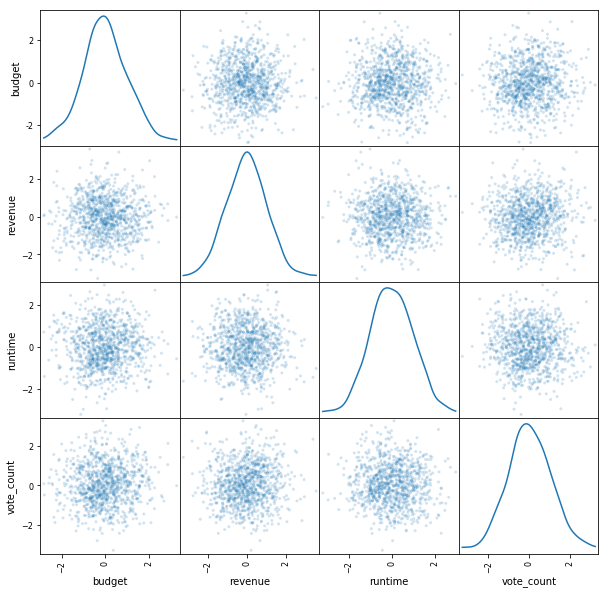

In [217]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['budget','revenue','runtime','vote_count'])

scatter_matrix(df, alpha=0.2, figsize=(10,10), diagonal='kde');

### it seems there's no correlation among the varibles 

# Data Cleaning 

after over viewing on the dataset, there are a few steps I'm going to do, first thing is to drop the unnecessary data then i will change the datatype for the one that is not appropriate ,I found that there are no duplicated rows and checking if there's any null valus or zeros .


### drop columns 

In [218]:

dfMovie.drop(['homepage','keywords','overview','tagline'], axis=1, inplace=True)

### after dropping

In [219]:

dfMovie.shape

(4803, 16)

### the dataset after dropping the unnecessary columns

In [220]:

dfMovie.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


### number of duplicates in the datasets

In [221]:

sum(dfCredit.duplicated())

0

In [222]:

sum(dfMovie.duplicated())

0

### change the datatype 

In [223]:

dfMovie['release_date']= dfMovie['release_date'].apply(pd.to_datetime)
dfMovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
original_language       4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 600.5+ KB


 ### to check if there is any null value

In [224]:
dfMovie.isnull().sum()

budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

### fill the nulls in the columns

In [225]:

dfMovie['runtime']=dfMovie['runtime'].replace(np.NaN, dfMovie['runtime'].mean())

In [226]:

dfMovie['release_date']=dfMovie['release_date'].fillna('N/a')

### check if there is still a null values 

In [227]:

dfMovie.isnull().sum()

budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

### filling the zero values with the mean 

In [228]:
dfMovie['budget']=dfMovie['budget'].replace('0', dfMovie['budget'].mean())
dfMovie['revenue']=dfMovie['revenue'].replace('0', dfMovie['revenue'].mean())

<a id='eda'></a>
# Exploratory Data Analysis

# dose the movies with high budget has a high vote_average? and dose the highest vote make a lot of revenue?

### check the static summary for [budget] column

In [229]:
dfMovie['budget'].describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

### check the static summary for [vote_average] column

In [230]:
dfMovie['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

## create a categorical variable from a quantitative variable

### Bin edges that will be used to "cut" the data into groups based on the min ,25%,50%,75%,max of the vote_average column


In [231]:
Vote=[0,5.6,6.2,6.8,10]

### Labels for the four Vote groups

In [232]:
estmiteVote=['bad','average','good','amazing']

### Creates TheVotingAverage column

In [233]:
dfMovie['TheVotingAverage']=pd.cut(dfMovie['vote_average'],Vote,labels=estmiteVote)

In [234]:
dfMovie.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,TheVotingAverage
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10 00:00:00,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,amazing
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19 00:00:00,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,amazing
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26 00:00:00,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,good
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16 00:00:00,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,amazing
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07 00:00:00,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,average


### chose the columns color

In [235]:
colors=['red']

### drawing the plot and determine the title , Xaxes-label and Yaxes-label in the plot

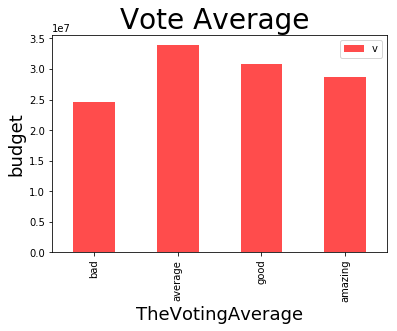

In [236]:

dfMovie.groupby('TheVotingAverage')['budget'].mean().plot(kind='bar',color=colors,alpha=0.7)
plt.title("Vote Average ", fontsize =28)
plt.xlabel('TheVotingAverage', fontsize =18)
plt.ylabel('budget', fontsize=18)
plt.legend('vote');

### The moves with *Average* vote has the highest budget 

### chose the columns color

In [237]:
colors=['blue']

#### so i used the previuos method ( *Vote Average vs budget*  ) to see which vote type has the highest revenue

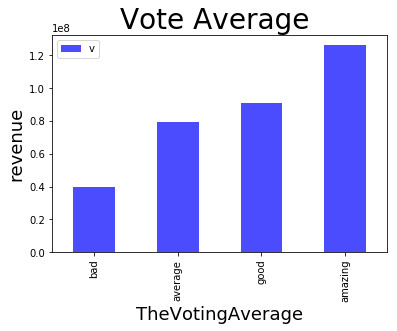

In [238]:
dfMovie.groupby('TheVotingAverage')['revenue'].mean().plot(kind='bar',color=colors,alpha=0.7)
plt.title("Vote Average ", fontsize =28)
plt.xlabel('TheVotingAverage', fontsize =18)
plt.ylabel('revenue', fontsize=18)
plt.legend('vote');

### The moves with *amazing* vote has the highest revenue 

### Here is a relationship showing that the higher budget it's not a mandatory to come out with high revenue, and seems to be a weak positive relationship between the variables 

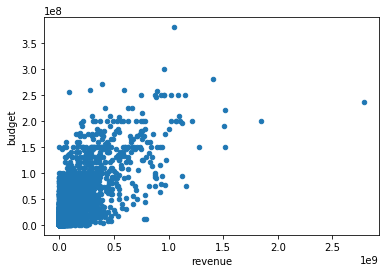

In [239]:
dfMovie.plot.scatter(x='revenue', y='budget');

### Here is a plot showing that the correlation = 0 and there's no relationship between the runtime of the movie and the coming out with high revenue

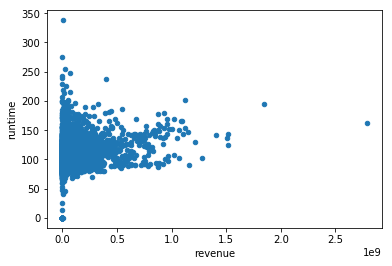

In [240]:
dfMovie.plot.scatter(x='revenue', y='runtime');

# which one of the title movies has the highest vote
### i have taken the first 10 samples to see

### Assign the first 10 samples into new data set without manipulate the original dataset.

In [241]:
dfMovie1=dfMovie.head(10)
dfMovie1.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,TheVotingAverage
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10 00:00:00,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,amazing
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19 00:00:00,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,amazing
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26 00:00:00,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,good
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16 00:00:00,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,amazing
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07 00:00:00,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,average


### Taking the titles and there vote_averages with the max function 

In [242]:
dfMovie1.groupby('title').vote_average.max()

title
Avatar                                      7.2
Avengers: Age of Ultron                     7.3
Batman v Superman: Dawn of Justice          5.7
Harry Potter and the Half-Blood Prince      7.4
John Carter                                 6.1
Pirates of the Caribbean: At World's End    6.9
Spectre                                     6.3
Spider-Man 3                                5.9
Tangled                                     7.4
The Dark Knight Rises                       7.6
Name: vote_average, dtype: float64

### chose the columns color

In [243]:
colors=['red','grey']

### drawing the plot and determine the title , Xaxes-label and Yaxes-label in the plot

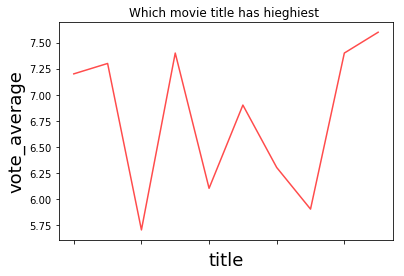

In [244]:
dfMovie1.groupby('title').max().vote_average.plot(kind='line',color=colors,alpha=0.7)
plt.title('Which movie title has hieghiest ')
plt.xlabel('title', fontsize =18)
plt.ylabel('vote_average', fontsize=18);

In [245]:

dfMovie1['title'].max()

'The Dark Knight Rises'

#### So by the chart i found that the movie the highest vote was *The Dark Knight Rises* and even with the *max()* showing the movie.

### so here i'm investgate which movie has the higher revenue among the moves 

#### so here I'm extracting each movie with its maximum revenue

In [246]:
dfMovie1.groupby('title').max().revenue

title
Avatar                                      2787965087
Avengers: Age of Ultron                     1405403694
Batman v Superman: Dawn of Justice           873260194
Harry Potter and the Half-Blood Prince       933959197
John Carter                                  284139100
Pirates of the Caribbean: At World's End     961000000
Spectre                                      880674609
Spider-Man 3                                 890871626
Tangled                                      591794936
The Dark Knight Rises                       1084939099
Name: revenue, dtype: int64

#### using the varible *series* to assign the information of the plot 

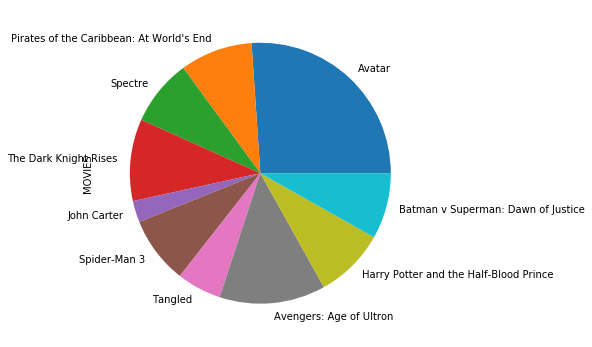

In [247]:
series = pd.Series(dfMovie1.groupby('title').max().revenue,dfMovie1['title'], name='MOVIES')
series.plot.pie(figsize=(6, 6));

#### I discovered that *Avatar*  has the highest revenues, where the *John Carter* has the lowest

### so know I'LL investgate which movie has the higher budget among the moves 

#### so here I'm extracting each movie with its maximum budget

In [248]:
dfMovie1.groupby('title').max().budget

title
Avatar                                      237000000
Avengers: Age of Ultron                     280000000
Batman v Superman: Dawn of Justice          250000000
Harry Potter and the Half-Blood Prince      250000000
John Carter                                 260000000
Pirates of the Caribbean: At World's End    300000000
Spectre                                     245000000
Spider-Man 3                                258000000
Tangled                                     260000000
The Dark Knight Rises                       250000000
Name: budget, dtype: int64

#### using the varible *series* to assign the information of the plot 

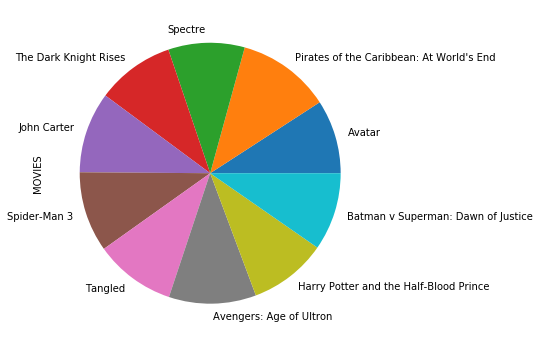

In [249]:
series = pd.Series(dfMovie1.groupby('title').max().budget,dfMovie1['title'], name='MOVIES')
series.plot.pie(figsize=(6, 6));

#### it seems in first look they have the same amount, but *Pirates of the Caribbean: At World's End* has the highest amount of budgest 

<a id='limitations'></a>
## Limitations

#### The cleaning part was most hardest part, more than one column like the 'genres' column has a dict so its hard to analyz't 

In [250]:
dfMovie.head(1)['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

#### so this's look like and it was really hard to extract the gener of the moves it will give a good findings like which kind of gener will make high vote of high revenu or cost high budget?

#### The other limit i faced is how to use multy attrbute to plot a meaning full qraph

<a id='conclusions'></a>
## Conclusions



In this dataset I've analyzed as much as I can, I've used a few methods to understand my data and then I notice a few extra columns I don't need and there's no duplicated row or null values. Moreover, there are some columns I didn't know how to analyze or clean it, I found some method like map() lamb() online but I think it not going to help me. However, I've explored the data in a lot perspectives, i want to see if he moves with the high budget has a high vote_average and the relationship between the budget, runtime, and revenue. the other one i chose the first 10 samples and see which one of them has the highest vote, highest revenue highest budget.